In [81]:
#Autor: Alonso Melgarejo
#Contacto: alonsoraulmgs@gmail.com
#Copyright: Big Data Academy

# Librerías

In [82]:
#Importamos las librerías estándar
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import glob
import os

In [83]:
#Importamos las librerías de Keras
from keras.utils.np_utils import to_categorical
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPool2D, AvgPool2D
from keras.layers import Activation
from keras.layers import Dense

# Conexión al repositorio de datos

In [84]:
#Nos conectamos a Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Funciones utilitarias

In [85]:
def leer_carpeta_de_imagenes_como_tensor(ruta):
  tensores = []

  #Obtenemos las rutas de las imágenes
  rutas_imagenes = sorted(glob.glob(ruta+'/*'))
  
  index = 0
  for ruta in rutas_imagenes:
    #Leemos la imagen
    imagen = image.load_img(
      ruta, 
      grayscale=False,
      color_mode="rgb",
      target_size = (32, 32),
      interpolation="nearest"
    )

    #La tensorizamos
    tensor = np.array([image.img_to_array(imagen)])

    #La agregamos a la lista de tensores
    if index == 0:
      tensores = tensor
    else:
      tensores = np.concatenate((tensores, tensor))

    index = index + 1

  #La retornamos
  return tensores

# Lectura de tensores

In [86]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

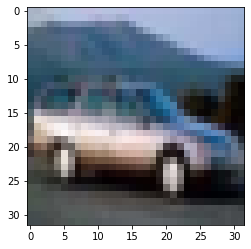

In [87]:
plt.imshow(x_train[4])

# Procesamiento de features

In [88]:
#PROCESAMIENTO DE LOS FEATURES DE ENTRENAMIENTO 

In [89]:
#Si no está en forma tensorial [imagenes, pixelX, pixelY, canales], deberemos adaptarlo
x_train.shape

(50000, 32, 32, 3)

In [90]:
#Escalamos los datos
x_tensor_train_scale = x_train.astype('float32') / 255.0
x_tensor_train_scale.shape

(50000, 32, 32, 3)

In [91]:
#PROCESAMIENTO DE LOS FEATURES DE VALIDACIÓN 

In [92]:
#Si no está en forma tensorial [imagenes, pixelX, pixelY, canales], deberemos adaptarlo
x_test.shape

(10000, 32, 32, 3)

In [93]:
#Escalamos los datos
x_tensor_test_scale = x_test.astype('float32') / 255.0
x_tensor_test_scale.shape

(10000, 32, 32, 3)

# Procesamiento de labels

In [94]:
#PROCESAMIENTO DE LOS LABELS DE ENTRENAMIENTO 

In [95]:
#Los labels tienen que estar categorizados
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [96]:
#Categorizamos los labels
y_train_categorico = to_categorical(y_train)
y_train_categorico.shape

(50000, 10)

In [97]:
#PROCESAMIENTO DE LOS LABELS DE VALIDACION 

In [98]:
#Los labels tienen que estar categorizados
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [99]:
#Categorizamos los labels
y_test_categorico = to_categorical(y_test)
y_test_categorico.shape

(10000, 10)

# Construcción de Red Convolucional

In [100]:
#Instaciamos un modelo vacío
model = Sequential()

In [101]:
#Capa 1
model.add(Conv2D(32, (2, 2), input_shape=(32, 32, 3)))

In [102]:
#Capa 2
model.add(Conv2D(32, (2, 2)))

In [103]:
#Capa 3
model.add(Conv2D(64, (4, 4)))

In [104]:
#Capa 4
model.add(Conv2D(64, (4, 4)))

# Vectorización del tensor

In [105]:
#Vectorizamos los patrones
model.add(Flatten())

# Red neuronal para clasificación

In [106]:
#Agregamos capas de nuestra red neuronal, 512 neuronas
model.add(Dense(512, activation='relu'))

In [107]:
#Como estamos clasificando, agregamos una capa de salida de 10 neuronas con softmax
model.add(Dense(10, activation='softmax'))

# Compilación del modelo de Deep Learning (Red Convolucional + Red Neuronal)

In [108]:
#Compilamos
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# Entrenamiento del modelo

In [109]:
#AL ejecutarlo, notamos que se entrena muy lento
#Esto se debe a la gran cantidad de información que se está procesando, matricialmente cada imagen es de 28x28, 
model.fit(x_tensor_train_scale, y_train_categorico, batch_size=128, epochs=2, verbose=1, validation_split=0.3)

Epoch 1/2
274/274 [==============================] - 19s 64ms/step - loss: 5.9262 - accuracy: 0.2610 - val_loss: 3.0004 - val_accuracy: 0.1865
Epoch 2/2
274/274 [==============================] - 17s 62ms/step - loss: 1.8633 - accuracy: 0.3660 - val_loss: 1.8293 - val_accuracy: 0.3729


# Evaluación del modelo

In [110]:
#Evaluamos el modelo
#Notamos que está acertando en el 97% de los casos
model.evaluate(x_tensor_test_scale, y_test_categorico)

313/313 [==============================] - 3s 8ms/step - loss: 1.8361 - accuracy: 0.3637


[1.8361461162567139, 0.3637000024318695]

# Uso del modelo

In [111]:
#Leemos las imagenes como tensores
tensores = leer_carpeta_de_imagenes_como_tensor('/content/drive/MyDrive/Data/CIFAR10')
tensores.shape

(2, 32, 32, 3)

In [112]:
#Usamos el modelo para predecir
predicciones_labels = model.predict(tensores)
predicciones_labels

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [113]:
#Obtenemos el índice del array de predicciones para saber a qué categoría pertenece
predicciones = predicciones_labels.argmax(axis = 1)
predicciones

array([8, 3])

In [114]:
#En el dataset cifar, las categorias estan etiquetadas de la siguiente manera
metadata = [
  'airplane',
  'automobile',
  'bird',
  'cat',
  'deer',
  'dog',
  'frog',
  'horse',
  'ship',
  'truck',
]

metadata

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [115]:
#Iteramos las predicciones para ver las categorias
for prediccion in predicciones:
  print(metadata[prediccion])

ship
cat
